In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import glob

def read_csvs(df_paths: list[str]):
    df = None
    for path in df_paths:
        exp_name = path.split('.csv')[0].split('/sat_')[-1]
        df_new = pd.read_csv(path, sep="\t")
        if df is None:
            df = df_new.copy()
        df[exp_name + '_model_runtime'] = df_new['model_runtime']
        df[exp_name + '_model_result'] = df_new['model_result']
        df[exp_name + '_model_steps_ran'] = df_new['model_steps_ran']
    df.pop('model_runtime')
    df.pop('model_result')
    df.pop('model_steps_ran')
    return df

def transform_df_compare_runtime(df: pd.DataFrame):
    dfs = []
    keys = list(df.keys())
    for index, row in df.iterrows():
        dict_row = {}
        # dict_row['prob_desc'] = row['prob_desc']
        # dict_row['baseline_runtime'] = row['baseline_runtime']
        runtimes = []
        lrs = []
        batchsizes = []
        desc = []
        for key in keys:
            if 'model_runtime' in key:
                lr = key.split('_')[-3]
                bs = 1000 if '_1000_' in key else 10000
                runtimes.append(row[key])
                lrs.append(lr)
                batchsizes.append(bs)
                desc.append(f'lr: {lr}\n bs: {bs}')
        dict_row['config'] = desc
        dict_row['model_runtime'] = runtimes
        dict_row['learning_rate'] = lrs
        dict_row['batch_size'] = batchsizes
        dict_row['prob_desc'] = [row['prob_desc']] * len(runtimes)
        dict_row['baseline_runtime'] = [row['baseline_runtime']] * len(runtimes)

        dfs.append(pd.DataFrame(dict_row))
    return dfs

def barplot_comparison(dfs: list[pd.DataFrame], x: str, y: str, hue: str, title: str, save_path: str):

    # sns.set_theme(style="whitegrid")
    # ax = sns.barplot(x=x, y=y, hue=hue, data=df)
    # ax.set_title(title)
    # plt.savefig(save_path)
    # plt.show()
    # create a nxn grid of subplots
    if len(dfs) > 8:
        dfs = dfs[:8]
    n = len(dfs)
    h = 2
    v = n//h
    fig, axes = plt.subplots(v, h, figsize=(32, 20))
    sns.set_theme(style="whitegrid")
    sns.set(font_scale=2.0)
    fig.suptitle(title)
    for i, df in enumerate(dfs):
        ax = axes[i//h, i%h]
        ax.tick_params(labelsize=14)
        # set axis label font size
        ax.set_xlabel(x, fontsize=18)
        ax.set_ylabel(y, fontsize=18)
        # set y-axis to log
        ax.set_yscale('log')
        sns.barplot(ax=ax, x=x, y=y, hue=hue, data=df)
        ax.set_title(df['prob_desc'].iloc[0], fontsize=18)
    # tight layout
    fig.tight_layout()
    plt.savefig(save_path)
    # plt.show()


def barplot_comparison_single(dfs: list[pd.DataFrame], x: str, y: str, hue: str, title: str, save_path: str, index: int):
    sns.set_theme(style="whitegrid")
    df = dfs[index]
    # set figure size
    fig, ax = plt.subplots(figsize=(16, 12))
    # set font size
    sns.set(font_scale=2.0)
    # plot barplot
    ax = sns.barplot(x=x, y=y, hue=hue, data=df)
    # set axis font size
    ax.tick_params(labelsize=14)
    # set axis title font size
    ax.set_title(title + ' ' +  df['prob_desc'].iloc[0], fontsize=18)
    # set axis label font size
    ax.set_xlabel(x, fontsize=18)
    ax.set_ylabel(y, fontsize=18)
    # set y-axis to log
    ax.set_yscale('log')
    # tight layout
    fig.tight_layout()
    plt.savefig(save_path)
    plt.show()



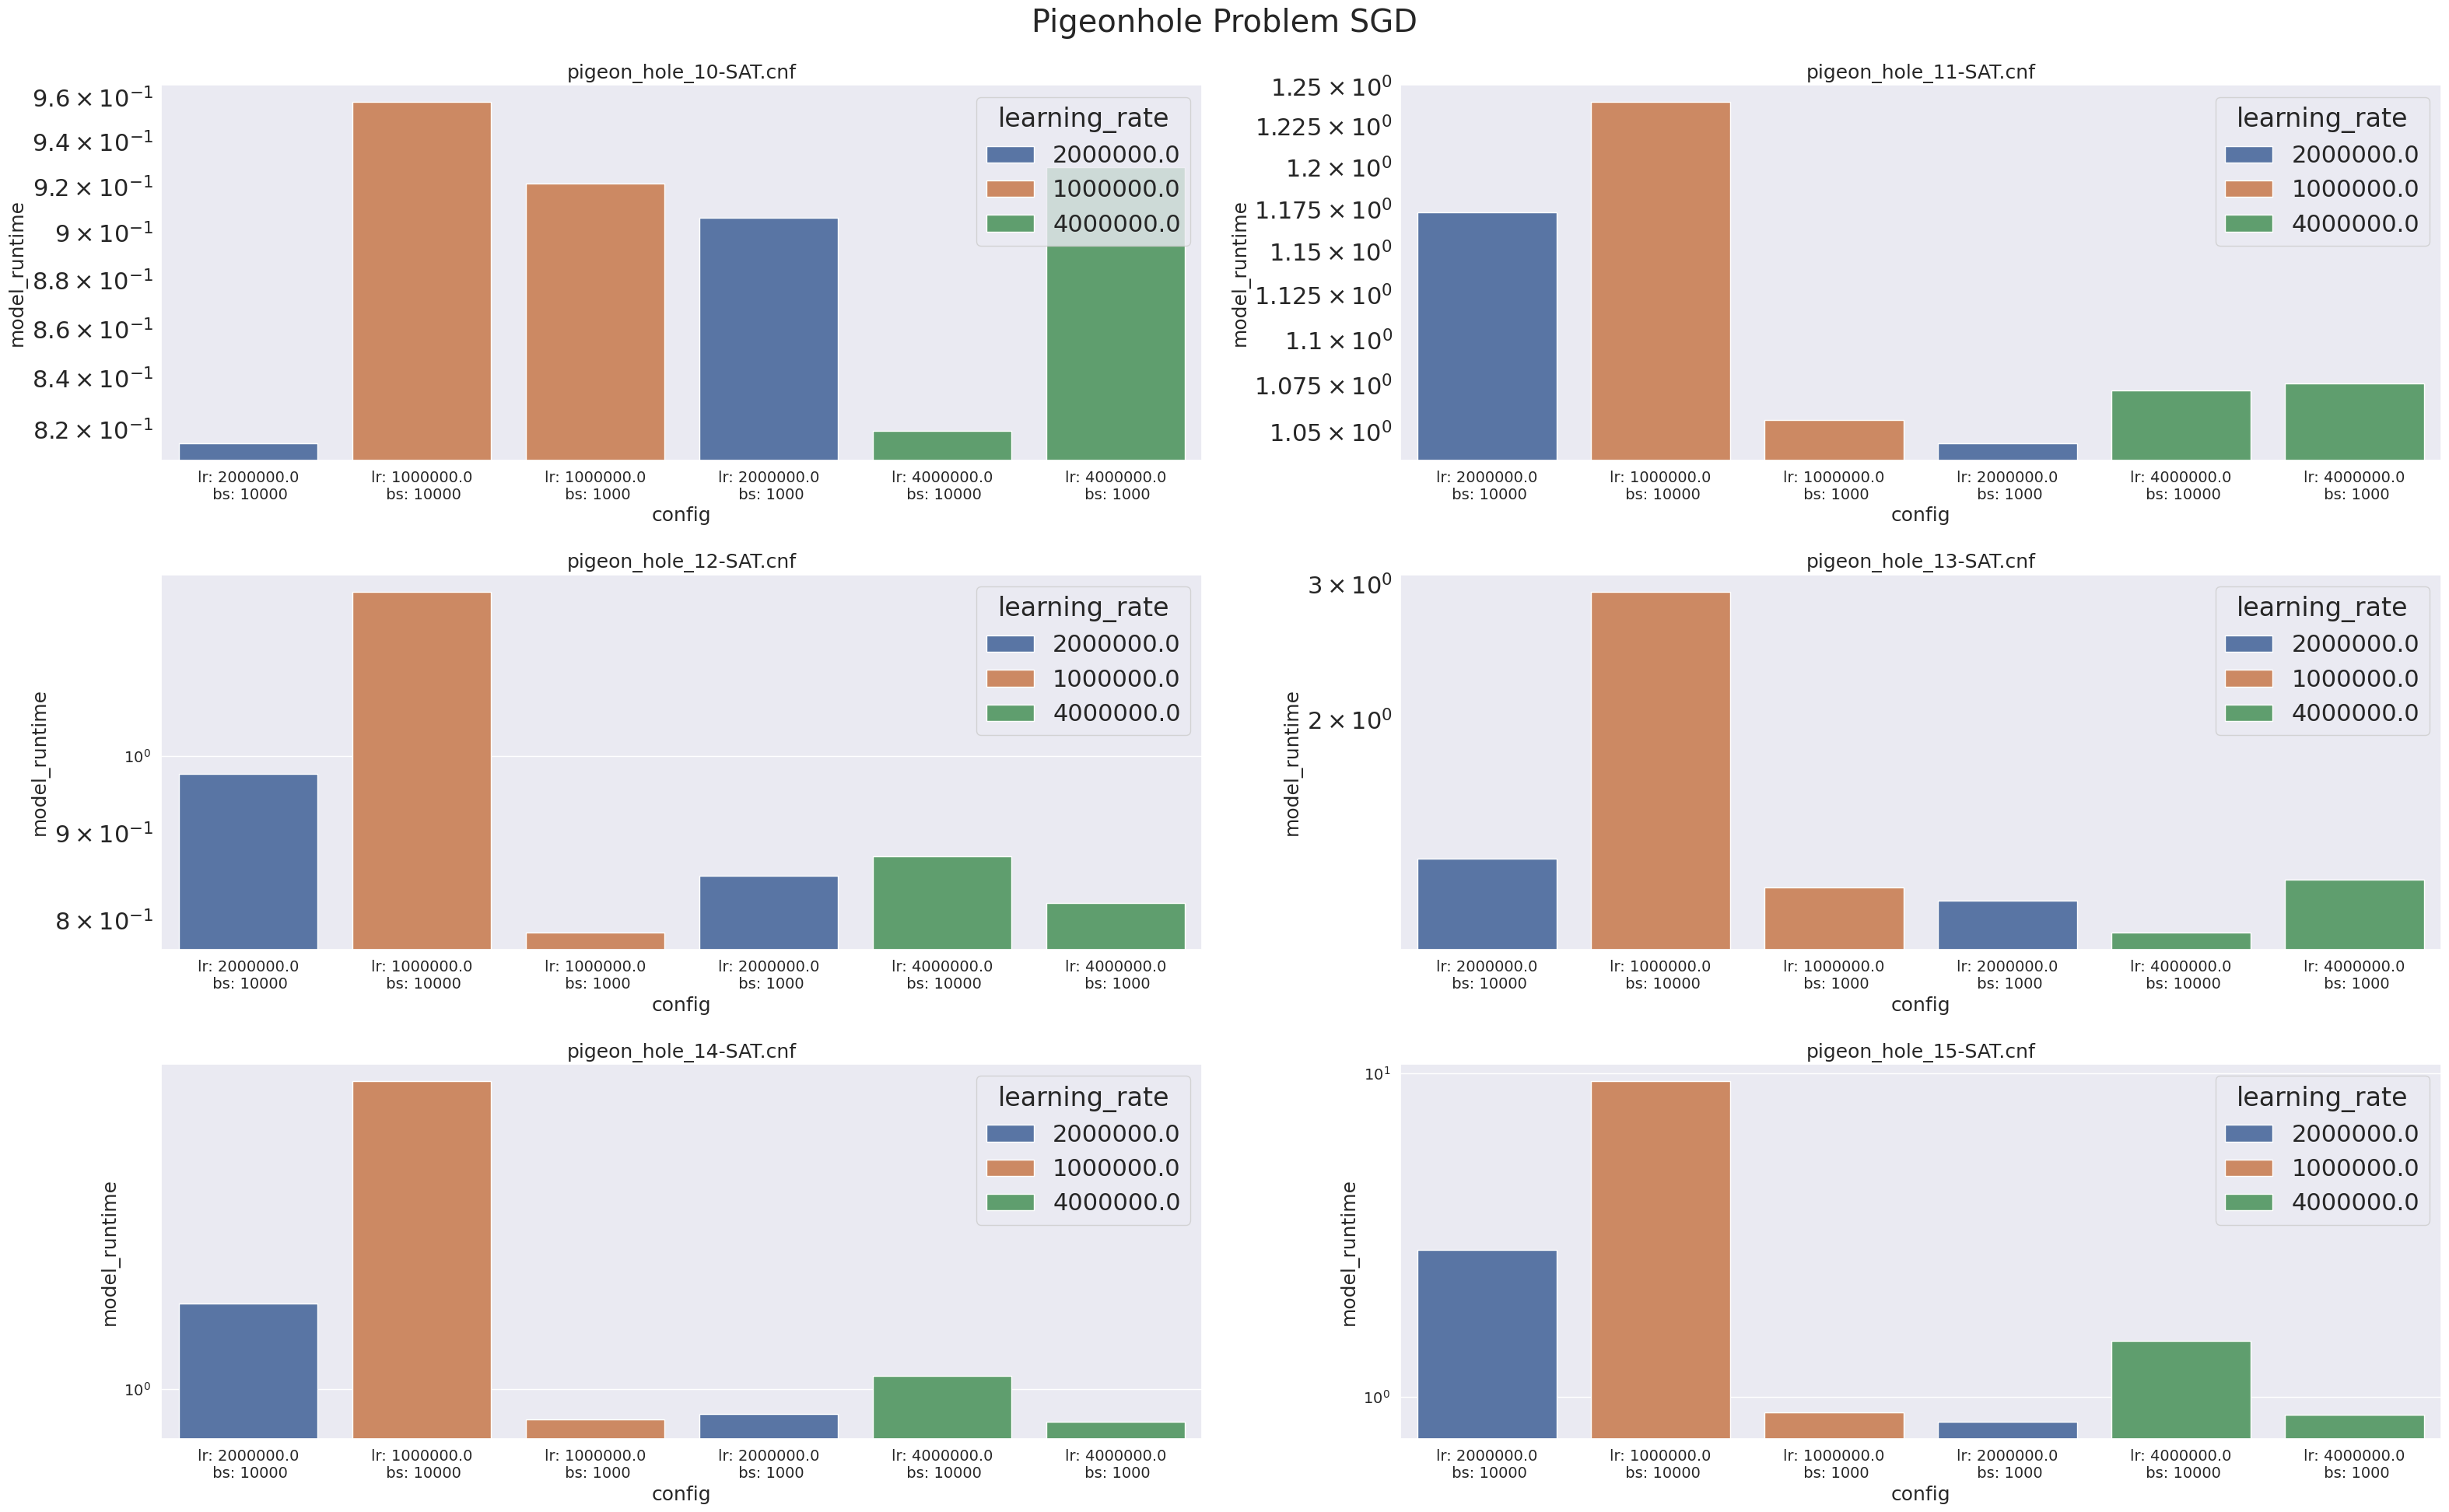

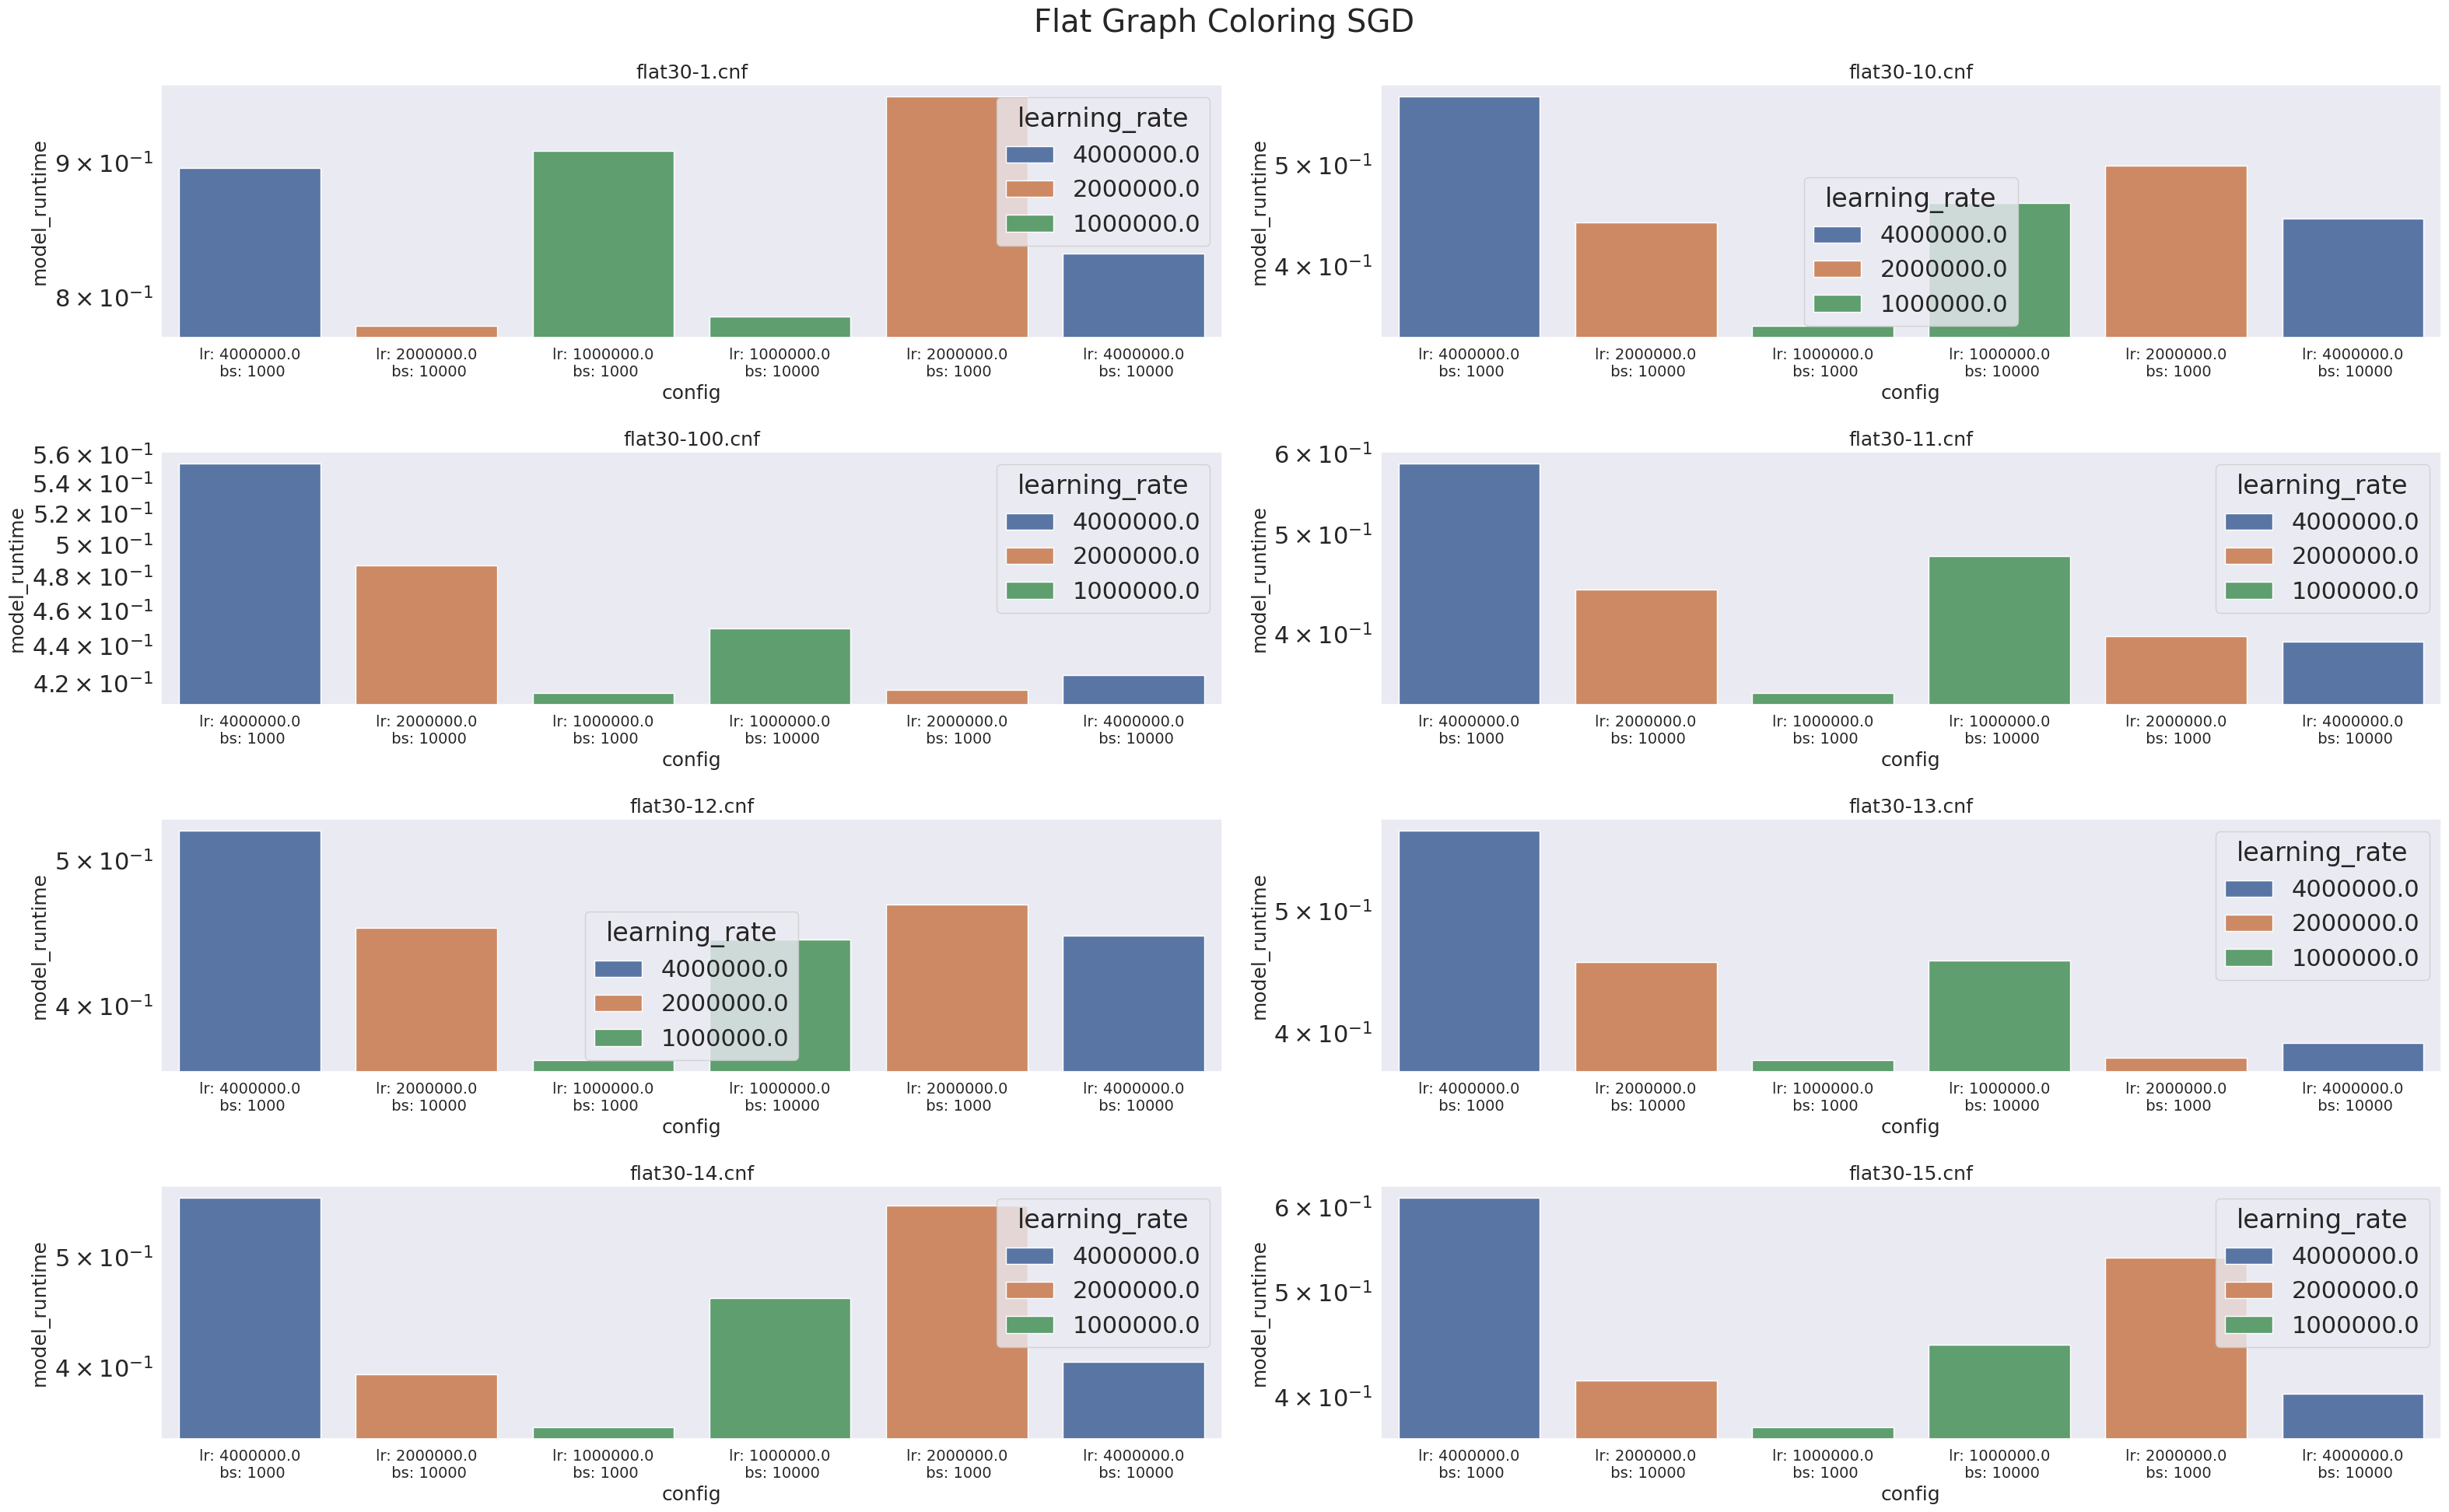

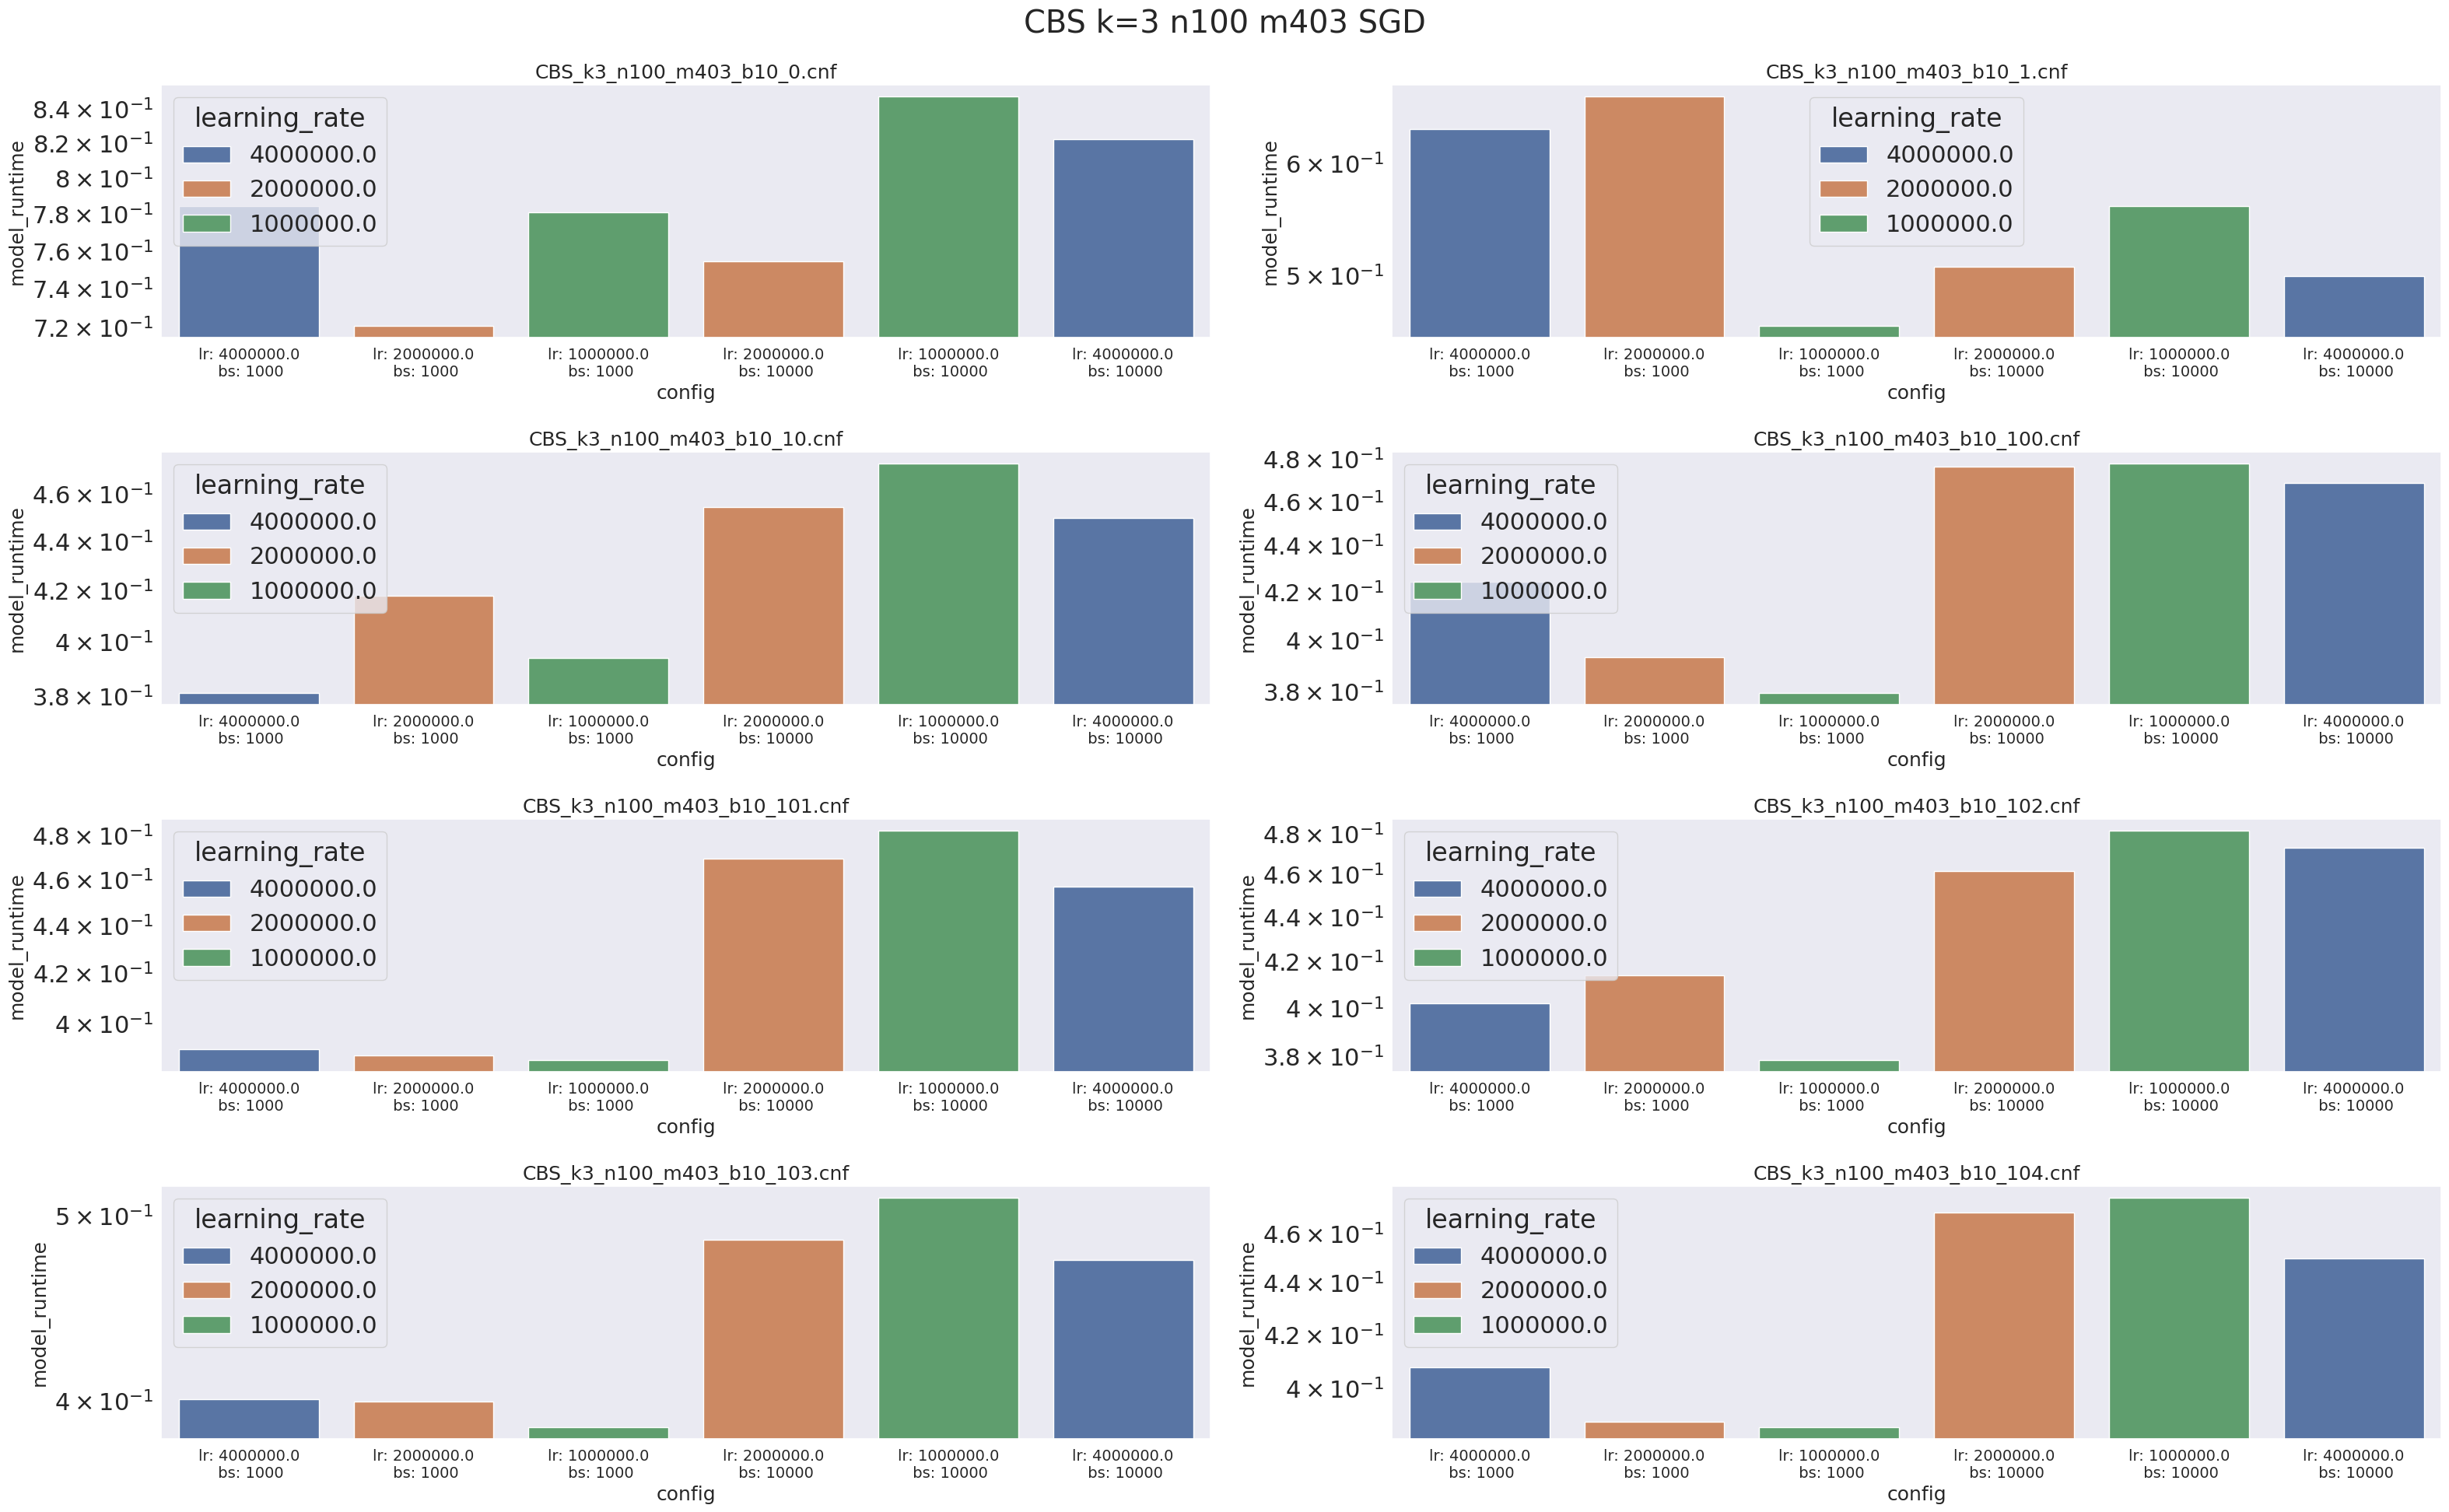

In [13]:
# read from results
barplot_comparison(transform_df_compare_runtime(read_csvs(glob.glob('../results/*pigeon*adam*.csv'))), 
x='config', y='model_runtime', hue='learning_rate', title='Pigeonhole Problem adam', save_path='../results/php_adam.png')
barplot_comparison(transform_df_compare_runtime(read_csvs(glob.glob('../results/*flat*adam*.csv'))), 
x='config', y='model_runtime', hue='learning_rate', title='Flat Graph Coloring SGD', save_path='../results/flat30_sgd.png')
barplot_comparison(transform_df_compare_runtime(read_csvs(glob.glob('../results/*cbs*sgd*.csv'))),
x='config', y='model_runtime', hue='learning_rate', title='CBS k=3 n100 m403 SGD', save_path='../results/cbsk3n100m403_sgd.png')

In [ ]:
# read from results
barplot_comparison(transform_df_compare_runtime(read_csvs(glob.glob('../results/*pigeon*adam*.csv'))), 
x='config', y='model_runtime', hue='learning_rate', title='Pigeonhole Problem ADAM', save_path='../results/php_adam.png')
barplot_comparison(transform_df_compare_runtime(read_csvs(glob.glob('../results/*flat*adam*.csv'))), 
x='config', y='model_runtime', hue='learning_rate', title='Flat Graph Coloring ADAM', save_path='../results/flat30_adam.png')
barplot_comparison(transform_df_compare_runtime(read_csvs(glob.glob('../results/*cbs*adam*.csv'))),
x='config', y='model_runtime', hue='learning_rate', title='CBS k=3 n100 m403 ADAM', save_path='../results/cbsk3n100m403_adam.png')